<a href="https://colab.research.google.com/github/Temmy-bit/Temmy/blob/main/Money_cnn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [154]:
from google.colab import drive
drive.mount

<function google.colab.drive.mount>

In [155]:
import numpy as np
import os
for dirpath, dirnames, filenames in os.walk('/content/drive/MyDrive/CUURENCY_DATASET'):
  print(f"Directories:{len(dirnames)}, Filenames:{len(filenames)} in {dirpath}")

Directories:8, Filenames:0 in /content/drive/MyDrive/CUURENCY_DATASET
Directories:0, Filenames:87 in /content/drive/MyDrive/CUURENCY_DATASET/5N
Directories:0, Filenames:224 in /content/drive/MyDrive/CUURENCY_DATASET/10N
Directories:0, Filenames:307 in /content/drive/MyDrive/CUURENCY_DATASET/20N
Directories:0, Filenames:420 in /content/drive/MyDrive/CUURENCY_DATASET/50N
Directories:0, Filenames:314 in /content/drive/MyDrive/CUURENCY_DATASET/100N
Directories:0, Filenames:348 in /content/drive/MyDrive/CUURENCY_DATASET/200N
Directories:0, Filenames:253 in /content/drive/MyDrive/CUURENCY_DATASET/500N
Directories:0, Filenames:374 in /content/drive/MyDrive/CUURENCY_DATASET/1000N


In [156]:
import os
for dirpath, dirnames, filenames in os.walk('/content/drive/MyDrive/Test'):
  print(f"Directories:{len(dirnames)}, Filenames:{len(filenames)} in {dirpath}")

Directories:8, Filenames:0 in /content/drive/MyDrive/Test
Directories:0, Filenames:27 in /content/drive/MyDrive/Test/20N
Directories:0, Filenames:12 in /content/drive/MyDrive/Test/5N
Directories:0, Filenames:33 in /content/drive/MyDrive/Test/100N
Directories:0, Filenames:33 in /content/drive/MyDrive/Test/1000N
Directories:0, Filenames:4 in /content/drive/MyDrive/Test/500N
Directories:0, Filenames:31 in /content/drive/MyDrive/Test/200N
Directories:0, Filenames:32 in /content/drive/MyDrive/Test/50N
Directories:0, Filenames:24 in /content/drive/MyDrive/Test/10N


In [157]:
# from sklearn.model_selection import train_test_split

In [158]:
# (X_train, y_train), (X_test, y_test) = train_test_split('/content/drive/MyDrive/CUURENCY_DATASET')

In [159]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# tf.random.set_seed(42)
train_datagen = ImageDataGenerator(rescale = 1./255)
valid_datagen = ImageDataGenerator(rescale = 1./255)

IMAGE_SHAPE = (224,224)
BATCH_SIZE = 32

train_dir = '/content/drive/MyDrive/CUURENCY_DATASET'
test_dir = '/content/drive/MyDrive/Test'

# tf.random.set_seed(42)
train_datagen = ImageDataGenerator(rescale = 1./255)
valid_datagen = ImageDataGenerator(rescale = 1./255)

train_data = train_datagen.flow_from_directory(directory = train_dir,
                                               batch_size=BATCH_SIZE,
                                               target_size=IMAGE_SHAPE,
                                               class_mode='categorical') 
valid_data = train_datagen.flow_from_directory(directory = test_dir,
                                               batch_size=32,
                                               target_size=(224,224),
                                               class_mode='categorical')


Found 2321 images belonging to 8 classes.
Found 196 images belonging to 8 classes.


In [160]:
# import tensorflow as tf
# from tensorflow.keras.preprocessing.image import ImageDataGenerator
# IMG_SIZE = (224,224)
# BATCH_SIZE = 32

# train_dir = '/content/drive/MyDrive/CUURENCY_DATASET'
# test_dir = '/content/drive/MyDrive/Test'
# train_data = tf.keras.preprocessing.image_dataset_from_directory(train_dir,
#                                                                  label_mode = 'categorical',
#                                                                  image_size = IMG_SIZE,
#                                                                  batch_size = BATCH_SIZE)

# test_data = tf.keras.preprocessing.image_dataset_from_directory(test_dir,
#                                                                  label_mode = 'categorical',
#                                                                  image_size = IMG_SIZE,
#                                                                  batch_size = BATCH_SIZE)


In [161]:
from tensorflow import keras
from keras import layers
from tensorflow.keras.layers.experimental import preprocessing

In [162]:
import pathlib
import numpy as np
data_dir = pathlib.Path(train_dir)
class_names = np.array(sorted([item.name for item in data_dir.glob('*')]))
print(class_names)


data = pathlib.Path(test_dir)
te_names = np.array(sorted([item.name for item in data.glob('*')]))
print(te_names)

['1000N' '100N' '10N' '200N' '20N' '500N' '50N' '5N']
['1000N' '100N' '10N' '200N' '20N' '500N' '50N' '5N']


In [163]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import random

In [164]:
def view_rand_img(target_dir,target_class):
  target_folder = target_dir+target_class

  random_image = random.sample(os.listdir(target_folder),1)
  print(random_image)

  img = mpimg.imread(target_folder+'/'+random_image[0])
  plt.imshow(img)
  plt.title(target_class)
  plt.axis('off');
# returns width,height,color channels
  print(f'Image shape: {img.shape}')

  return img

['IMG_5074.JPG']
Image shape: (2448, 3264, 3)


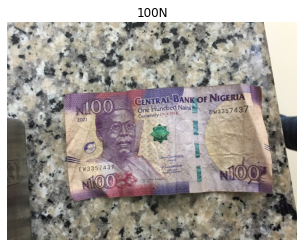

In [165]:
img = view_rand_img(target_dir='/content/drive/MyDrive/CUURENCY_DATASET/',target_class=random.choice(class_names))

['IMG_4392.JPG']
Image shape: (2448, 3264, 3)


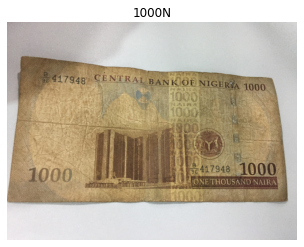

In [166]:
img = view_rand_img(target_dir='/content/drive/MyDrive/Test/',target_class=random.choice(te_names))

In [167]:
import datetime 
def create_tensorboard_callback(dir_name,experiment_name):
  log_dir = dir_name + '/' + experiment_name +'/'+datetime.datetime.now().strftime('%Y%m%d-%H%M%S')
  tensorboard_callback = keras.callbacks.TensorBoard(log_dir=log_dir)
  print(f'Saving Tensorboard log files to: {log_dir}')
  return tensorboard_callback

In [168]:
def create_model_callback(dir_name,experiment_name):
  log_dir = dir_name + '/' + experiment_name +'/'+datetime.datetime.now().strftime('%Y%m%d-%H%M%S')
  model_callback = keras.callbacks.ModelCheckpoint(filepath=log_dir,monitor = 'val_loss',save_weights_only = True)
  print(f'Saving Tensorboard log files to: {log_dir}')
  return model_callback

In [169]:
# tf.keras.callbacks.ModelCheckpoint(
#     filepath,
#     monitor='val_loss',
#     verbose=0,
#     save_best_only=False,
#     save_weights_only=False,
#     mode='auto',
#     save_freq='epoch',
#     options=None,
#     initial_value_threshold=None,
#     **kwargs
# )


In [170]:
effnet = "https://tfhub.dev/tensorflow/efficientnet/b0/feature-vector/1"
resnet = "https://tfhub.dev/google/imagenet/resnet_v2_50/classification/5"
unet = 'https://tfhub.dev/nvidia/unet/industrial/class_10/1' 
inception = 'https://tfhub.dev/google/logit_reconstruction/inceptionv3/1'

In [171]:
import tensorflow as tf
import tensorflow_hub as hub
from tensorflow.keras import layers
import keras

In [172]:
def create_model(model_url, num_classes=8):
  feature_extractor_layer = hub.KerasLayer(model_url,
                                           trainable=False,name='feature_extraction_layer',
                                           input_shape=IMAGE_SHAPE+(3,))
  

  model = keras.Sequential([
                            feature_extractor_layer,
                            layers.Dense(num_classes,activation='softmax',name='output_layer')
  ])
  return model

In [173]:
resnet_model = create_model(resnet,num_classes=len(class_names))

In [174]:
len(class_names)

8

In [175]:
effnet_model = create_model(effnet,num_classes=len(class_names))
effnet_model.compile(loss='categorical_crossentropy',optimizer=tf.keras.optimizers.Adam(),metrics=['accuracy'])
effnet_history = effnet_model.fit(train_data,epochs=5,steps_per_epoch = len(train_data),
                      validation_data = valid_data,
                      validation_steps = len(valid_data),
                      callbacks = (create_model_callback(dir_name='/content/drive/MyDrive/naira notes',
                                                               experiment_name='efficientnet_B0')))

Saving Tensorboard log files to: /content/drive/MyDrive/naira notes/efficientnet_B0/20220620-144650
Epoch 1/5
73/73 [==============================] - 178s 2s/step - loss: 1.2339 - accuracy: 0.6635 - val_loss: 0.8507 - val_accuracy: 0.8878
Epoch 2/5
73/73 [==============================] - 167s 2s/step - loss: 0.5707 - accuracy: 0.9100 - val_loss: 0.5035 - val_accuracy: 0.9541
Epoch 3/5
73/73 [==============================] - 167s 2s/step - loss: 0.3740 - accuracy: 0.9509 - val_loss: 0.3240 - val_accuracy: 0.9745
Epoch 4/5
73/73 [==============================] - 167s 2s/step - loss: 0.2780 - accuracy: 0.9685 - val_loss: 0.2537 - val_accuracy: 0.9847
Epoch 5/5
73/73 [==============================] - 166s 2s/step - loss: 0.2219 - accuracy: 0.9716 - val_loss: 0.1926 - val_accuracy: 0.9898


In [176]:
effnet_model.evaluate(valid_data)

7/7 [==============================] - 8s 1s/step - loss: 0.1926 - accuracy: 0.9898


[0.19256335496902466, 0.9897959232330322]

In [ ]:
effnet_model.predict(valid_data)

In [ ]:
import pandas as pd 

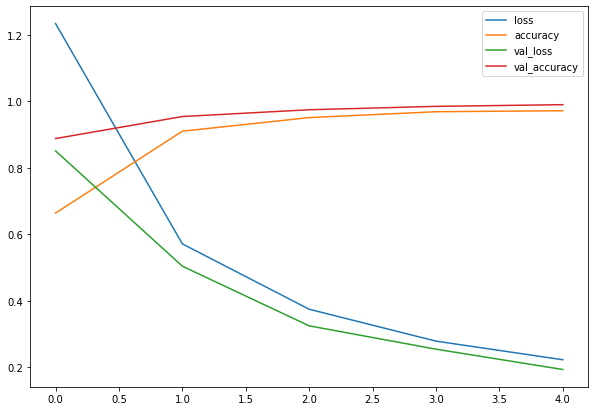

In [179]:
pd.DataFrame(effnet_history.history).plot(figsize=(10,7));

In [180]:
from keras.models import load_model

from keras.models import model_from_json

model_json = effnet_model.to_json()
with open("model.json", "w") as json_file:
    json_file.write(model_json)
#saves the model info as json file
    
effnet_model.save_weights("model.h5")
# Creates a HDF5 file 'model.h5'

In [181]:
effnet_model.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 feature_extraction_layer (K  (None, 1280)             4049564   
 erasLayer)                                                      
                                                                 
 output_layer (Dense)        (None, 8)                 10248     
                                                                 
Total params: 4,059,812
Trainable params: 10,248
Non-trainable params: 4,049,564
_________________________________________________________________


In [182]:
def load_and_pred_img(filename,image_size=224):
    
    #Read in image
    img = tf.io.read_file(filename)
    
    #Decode the read image to tensor
    img = tf.image.decode_image(img)
    
    #Resize the image
    img = tf.image.resize(img,size=[224, 224])
    img = tf.expand_dims(img,axis=0)
    
    img = img/255.
    pred = effnet_model.predict(img)
    class_names = ['1000N', '100N', '10N', '200N', '20N', '500N', '50N', '5N']
    pred_class = class_names[int(tf.round(np.argmax(pred)))]
    return pred_class

# img = load_and_prep_img('Desktop\6-04-2022\20 Naira\IMG_4403.JPG')
# pred = model.predict(img)[0].round(0)


print('Model successfully ran')

Model successfully ran


In [183]:
img = load_and_pred_img('/content/500.jpg',image_size=(224,224))

In [184]:
img

'500N'

In [185]:
img_1 = load_and_pred_img('/content/IMG_4236.JPG')
img_1

'500N'

In [186]:
# class_names

In [187]:
image = load_and_pred_img('/content/IMG_4268.JPG')

# pred = effnet_model.predict(image)
# pred_class = class_names[int(tf.round(np.argmax(pred)))]
pred_class

'500N'

In [188]:
image = load_and_pred_img('/content/IMG_4290.JPG')
image = tf.expand_dims(image,axis=0)
# pred = effnet_model.predict(image)
# pred_class = class_names[int(tf.round(np.argmax(pred)))]
pred_class

'500N'

In [189]:
pred_class = class_names[int(tf.round(np.argmax(pred1)))]

In [190]:
pred_class

'500N'

In [191]:
image = load_and_prep_img('/content/IMG_4236.JPG')
# image = tf.expand_dims(image,axis=0)
# pred = effnet_model.predict(image)
# pred_class = class_names[int(tf.round(np.argmax(pred)))]
pred_class

'500N'

In [192]:
# make_prediction(pred)

In [193]:
resnet_model.compile(loss='categorical_crossentropy',optimizer=tf.keras.optimizers.Adam(),metrics=['accuracy'])

In [194]:
resnet_model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 feature_extraction_layer (K  (None, 1001)             25615849  
 erasLayer)                                                      
                                                                 
 output_layer (Dense)        (None, 8)                 8016      
                                                                 
Total params: 25,623,865
Trainable params: 8,016
Non-trainable params: 25,615,849
_________________________________________________________________


In [195]:
resnet_history = resnet_model.fit(train_data,epochs=5,steps_per_epoch = len(train_data),
                      validation_data = valid_data,
                      validation_steps = len(valid_data),
                      callbacks = (create_tensorboard_callback(dir_name='tensorflow_hub',
                                                               experiment_name='resnet_v2_50')))

Saving Tensorboard log files to: tensorflow_hub/resnet_v2_50/20220620-150157
Epoch 1/5
73/73 [==============================] - 173s 2s/step - loss: 1.3237 - accuracy: 0.5528 - val_loss: 0.8000 - val_accuracy: 0.7653
Epoch 2/5
73/73 [==============================] - 165s 2s/step - loss: 0.5614 - accuracy: 0.8285 - val_loss: 0.5042 - val_accuracy: 0.8776
Epoch 3/5
73/73 [==============================] - 166s 2s/step - loss: 0.4031 - accuracy: 0.8871 - val_loss: 0.4006 - val_accuracy: 0.8827
Epoch 4/5
73/73 [==============================] - 164s 2s/step - loss: 0.3125 - accuracy: 0.9168 - val_loss: 0.2659 - val_accuracy: 0.9490
Epoch 5/5
73/73 [==============================] - 164s 2s/step - loss: 0.2499 - accuracy: 0.9384 - val_loss: 0.2135 - val_accuracy: 0.9694


In [ ]:
import pandas as pd
pd.DataFrame(resnet_history.history).plot(figsize=(10,7));

In [ ]:
# inception_model = create_model(inception,num_classes=train_data.num_classes)
# inception_model.compile(loss='categorical_crossentropy',optimizer=tf.keras.optimizers.Adam(),metrics=['accuracy'])
# inception_history = inception_model.fit(train_data,epochs=5,steps_per_epoch = len(train_data),
#                       # validation_data = valid_data,
#                       # validation_steps = len(valid_data),
#                       callbacks = (create_tensorboard_callback(dir_name='tensorflow_hub',
#                                                                experiment_name='inception_V3')))

In [198]:
resnet_model.evaluate(valid_data)

7/7 [==============================] - 8s 1s/step - loss: 0.2135 - accuracy: 0.9694


[0.21351216733455658, 0.9693877696990967]